In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
from gensim import corpora, models
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
nltk.download('punkt')
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from textblob import TextBlob
from gensim.models import CoherenceModel
from gensim.models import TfidfModel
import re
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/janapawlenczuk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/janapawlenczuk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/janapawlenczuk/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Opinion Leaders 500e: Articles & Youtube Video Transcripts

In [37]:
opinionLeaders500_original = pd.read_csv('500e - Opinion Leaders.csv')
opinionLeaders500 = opinionLeaders500_original.copy()

opinionLeaders500 = opinionLeaders500.drop(columns=['Date', 'Title', 'Channel Name'])

# Download necessary NLTK data files for tokenisation and stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/janapawlenczuk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/janapawlenczuk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

/Users/janapawlenczuk/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


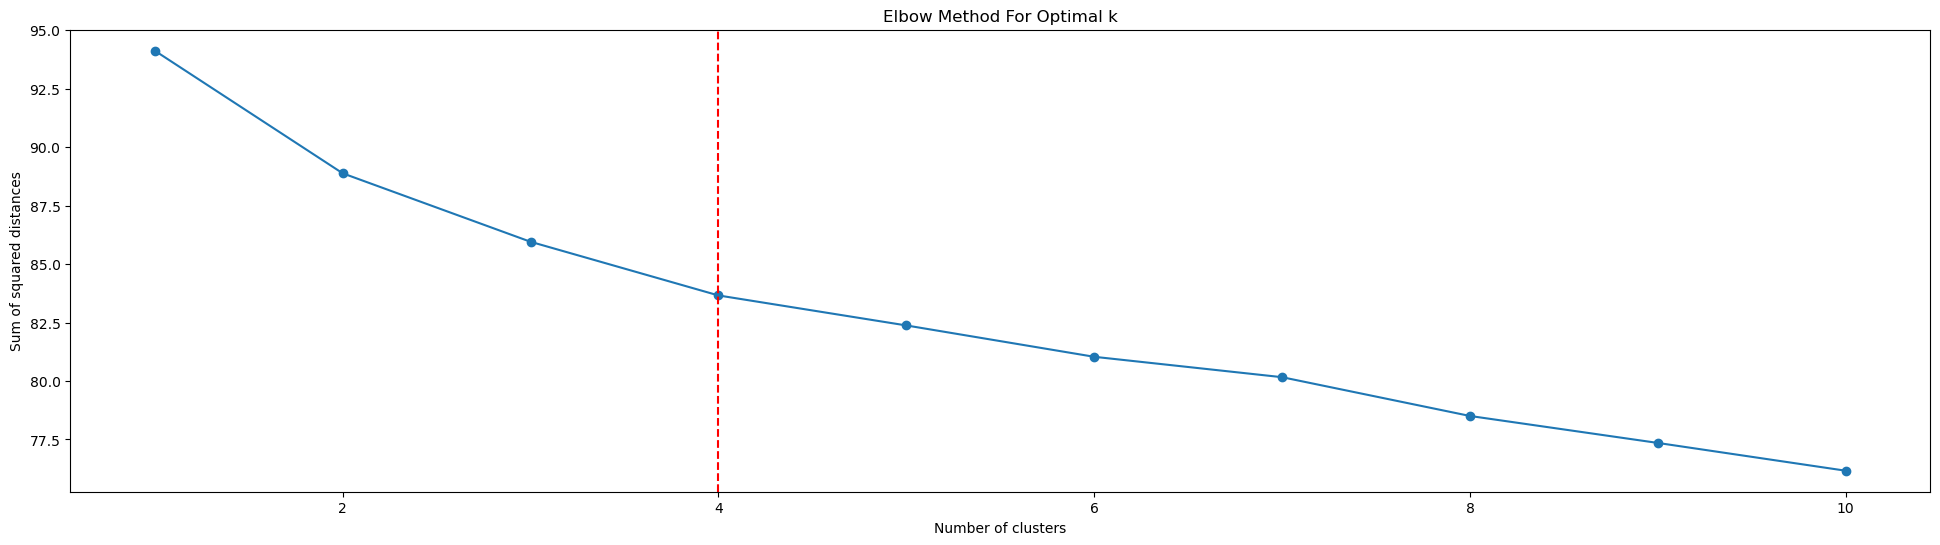

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/janapawlenczuk/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Cluster 0 Top Keywords:
brand, italy, ahmed, charging, drive, next, global, red, inspired, industry

Cluster 0 Key Articles:
- Price reductions on selected cars, from £250 - £1000 off The Fiat 500e is a fresh take on an icon – but is it reliable? Fiat 500e reliability is likely one of the main things you’ll think about before buying – especially if you’re new to electric cars.   The long and short of it is that electric vehicles (EVs) are generally very reliable because there’s less to go wrong than in petrol or diesel cars.   EVs like the Fiat 500e also often get a lengthy battery warranty, which is always a bonus.  So, is the Fiat 500e reliable? We give you the details in our guide.   Since it’s a new model, Fiat 500e reliability isn’t the easiest to gauge, but so far, so good. The 500e scores well on reliability surveys and reviews are overwhelmingly positive.   Its drivers love it for daily driving but do say the quality feels like the Fiat 500 – so, not as luxurious as some prici

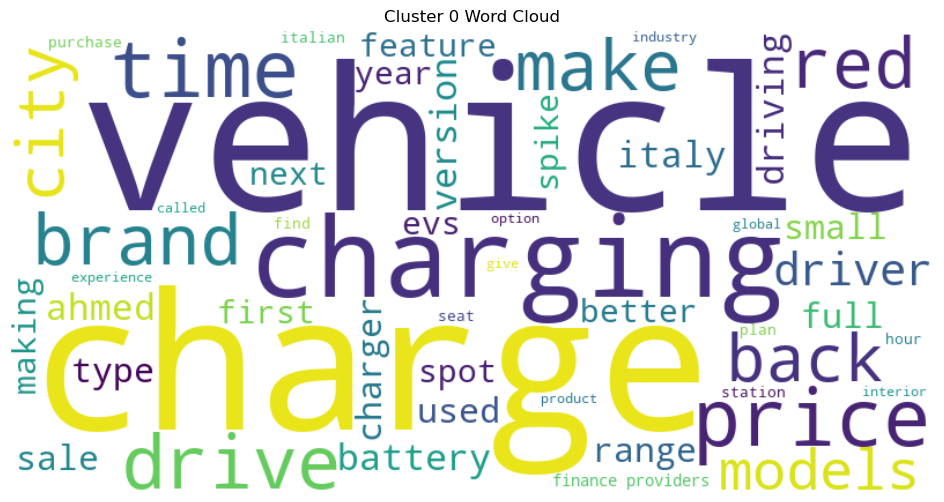


Cluster 0 Sample Articles:
2    2024 Fiat 500e (Photo provided by Fiat) La Dol...
3    The Fiat 500e not only offers the lowest MSRP ...
4    See also: FIAT 500e: Electric Icon Arrives in ...
Name: Text, dtype: object


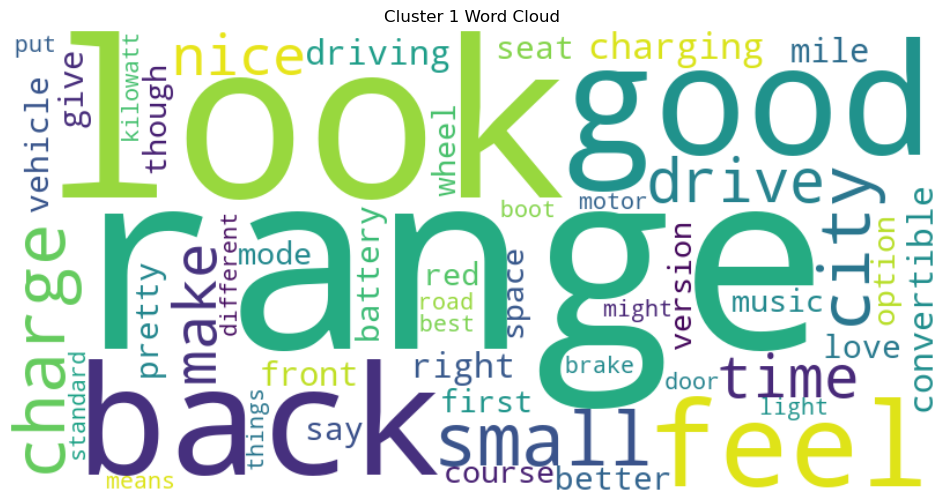


Cluster 1 Sample Articles:
0     Fiat made the 2013 500e specifically for the U...
1     Save Money. Use the U.S. News Best Price Progr...
13    ► We list our best small electric cars► Fun, s...
Name: Text, dtype: object


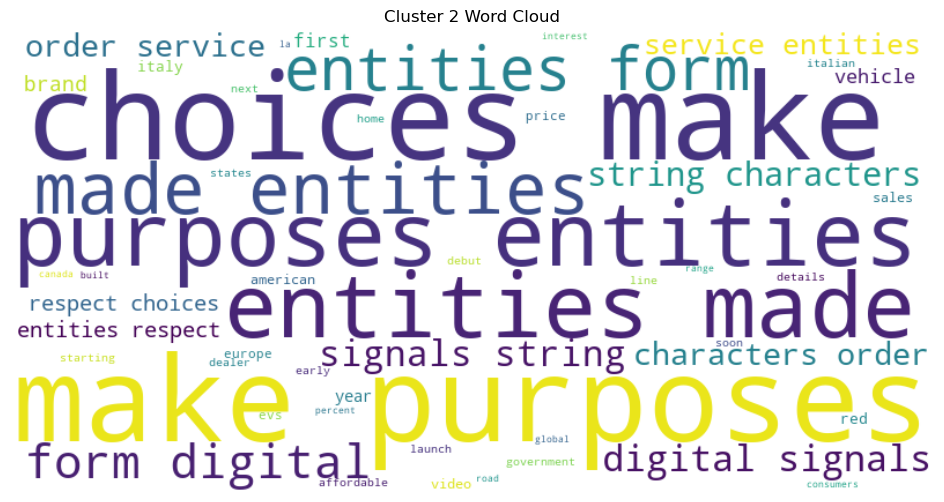


Cluster 2 Sample Articles:
11    " The 2024 Fiat 500e has two qualities that co...
26    La Dolce Vita Meets the American Dream: FIAT B...
31    The Fiat 500e will return to the US as one of ...
Name: Text, dtype: object


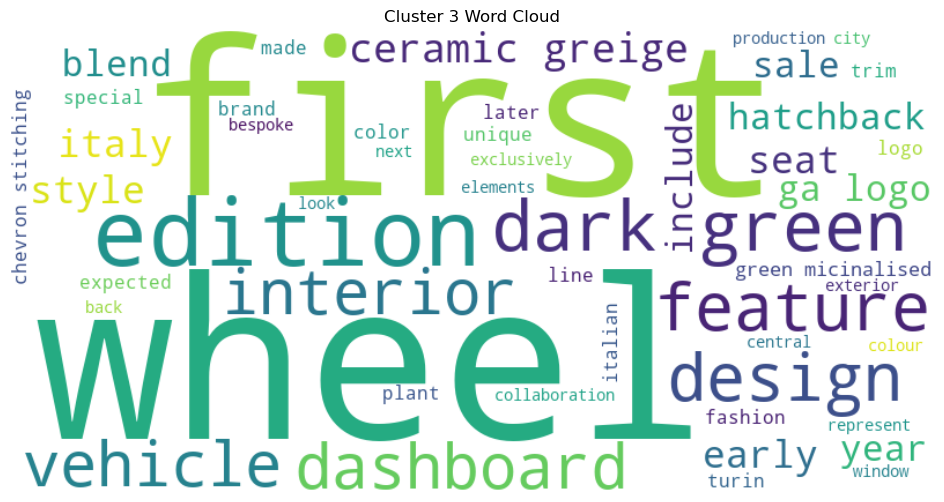


Cluster 3 Sample Articles:
6      The exterior is devoid of any chrome trimming...
10    \nProduced at the Fiat Mirafiori plant in Turi...
14    Fiat 500e Giorgio Armani in Dark Green  Billed...
Name: Text, dtype: object


In [38]:
# Load the dataset
opinionLeaders500 = pd.read_csv('500e - Opinion Leaders.csv')

# Drop irrelevant columns and ensure necessary columns are present
opinionLeaders500 = opinionLeaders500.drop(columns=['Date', 'Title', 'Channel Name'])

# Update stopwords handling
custom_stopwords = set(stopwords.words('english'))
additional_stopwords = [
    'electric', 'ev', 'model', 'car', 'cars', 'fiat', 'peugeot', 'jeep', 'hyundai', 'kona', 'mini', 'stellantis', 'sherpa', 'honda', 'zoe', 'renault', 'tesla', 'chinese', 'avenger', 'abarth',
    'market', 'available', 'new', 'offered', 'sold', 'week', 'level', 'move', 'presented',
    'would', 'also', 'like', 'even', 'according', 'one', 'since', 'still', 'two',
    'content', 'information', 'interests', 'activity', 'mean', 'go', 'quit',
    'got', 'much', 'actual', 'thing', 'bit', 'see', 'think', 'yeah', 'know', 'and',
    'way', 'come', 'example', 'esposito', 'lee', 'torque', 'ready', 'around', 'use', 'um',
    'together', 'us', 'really', 'america', 'well', 'mirafiori', 'campaign', 'north',
    'bag', 'says', 'get', 'world', 'germani', 'belgium', 'spain',
    'uh', 'oh', 'im', 'thats', 'youre', 'weve', 'dont', 'actually', 'work', 'reuters', 'youve', 'there', 'going',
    'gelateria', 'list', 'required', 'instead', 'added', 'inbox', 'help', 'dedicated',
    'inform', 'news', 'group', 'report', 'couldnt', 'three', 'including', 'however', 'people',
    'ice', 'doesnt', 'less', 'kind', 'want', 'fat', 'okay', 'notice', 'be', 'comes', 'little', 'feeling',
    'claim', 'ever', 'probably', 'take', 'something', 'end', 'many', 'ago', 'ive',
    'thought', 'claimed', 'data', 'review', 'isnt', 'regarding', 'listed', 'enable', 'saved', 'necessary',
    'said', 'may', 'point', 'armani', 'entity', 'giorgio', 'uk', 'lot', 'let', 'quite', 'need', 'e',
    'murray', 'gordon', 'could', 'turn', 'day', 'thinking', 'long', 'able'
]
custom_stopwords.update(additional_stopwords)

# Define preprocessing function
def preprocess(text):
    if isinstance(text, str):
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha() and word not in custom_stopwords]
        return ' '.join(tokens)
    else:
        return ''

# Preprocess the text data
opinionLeaders500['cleaned_text'] = opinionLeaders500['Text'].apply(preprocess)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(opinionLeaders500['cleaned_text'])

# Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_tfidf)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(24, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.axvline(x=4, color='red', linestyle='--')  # Add a red line for the optimal number of clusters
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

# Apply KMeans Clustering with optimal clusters determined by Elbow Method
optimal_k = 4  # Replace with the optimal number of clusters determined from the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_tfidf)

# Add the cluster labels to your original DataFrame
opinionLeaders500['Cluster'] = clusters

# Function to get top keywords in each cluster
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    terms = labels
    top_keywords = {}
    for i, r in df.iterrows():
        top_keywords[i] = [terms[t] for t in np.argsort(r)[-n_terms:]]
    return top_keywords

# Function to get key articles for each cluster
def get_key_articles(data, clusters, n_articles):
    key_articles = {}
    for cluster_num in range(len(set(clusters))):
        cluster_data = data[data['Cluster'] == cluster_num]
        key_articles[cluster_num] = cluster_data[['Text', 'Sentiment']].sort_values(by='Sentiment', ascending=False).head(n_articles).values.tolist()
    return key_articles

# Ensure you have the necessary NLTK data
nltk.download('vader_lexicon')

# Add sentiment analysis
sid = SentimentIntensityAnalyzer()
opinionLeaders500['Sentiment'] = opinionLeaders500['Text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Get top keywords and key articles
top_keywords = get_top_keywords(X_tfidf, clusters, tfidf_vectorizer.get_feature_names_out(), 10)
key_articles = get_key_articles(opinionLeaders500, clusters, 2)

# Print top keywords, key articles, and average sentiment score for each cluster
for cluster_num in range(optimal_k):
    print(f"\nCluster {cluster_num} Top Keywords:")
    print(', '.join(top_keywords[cluster_num]))
    
    print(f"\nCluster {cluster_num} Key Articles:")
    for article, sentiment in key_articles[cluster_num]:
        print(f"- {article} (Sentiment: {sentiment})")
    
    avg_sentiment = opinionLeaders500[opinionLeaders500['Cluster'] == cluster_num]['Sentiment'].mean()
    print(f"\nCluster {cluster_num} Average Sentiment Score: {avg_sentiment}")

# Generate word clouds and analyze clusters
for cluster_num in range(optimal_k):
    cluster_data = opinionLeaders500[opinionLeaders500['Cluster'] == cluster_num]
    cluster_text = cluster_data['cleaned_text'].str.cat(sep=' ')
    
    wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white', stopwords=custom_stopwords, random_state=610).generate(cluster_text)
    
    plt.figure(figsize=(24, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Cluster {cluster_num} Word Cloud")
    plt.show()

    # Display sample articles from each cluster
    print(f"\nCluster {cluster_num} Sample Articles:")
    print(cluster_data['Text'].head(3))


**Cluster 0 Summary:**
Top Keywords: brand, italy, ahmed, charging, drive, next, global, red, inspired, industry

Summary:
This cluster focuses on the brand image and reliability of the Fiat 500e, highlighting its Italian heritage and global appeal. Articles discuss the car’s reliability, safety ratings, and the premium feel of the interior, despite it not matching more luxurious models. The sentiment is generally positive, with users appreciating the vehicle for daily driving and its advanced safety features.

Average Sentiment Score: 0.7537

**Cluster 1 Summary:**
Top Keywords: city, look, drive, mode, good, battery, driving, back, small, range

Summary:
Comments in this cluster center around the practicality and usability of the Fiat 500e in city environments. Articles provide detailed road tests and user experiences, discussing the car's performance, range, and charging options. There’s a focus on the car's stylish design, ease of driving, and technological features. The overall sentiment is very positive, indicating high satisfaction with the car's functionality in urban settings.

Average Sentiment Score: 0.9904

**Cluster 2 Summary:**
Top Keywords: service, respect, form, purposes, characters, string, signals, order, choices, entities

Summary:
This cluster includes discussions on the Fiat 500e’s market presence and its entry into the US market. Articles highlight the car's popularity in Europe and its anticipated success in the US, mentioning how it quickly sold out its first dealer allocation. The sentiment is predominantly positive, reflecting excitement about the car's availability and features.

Average Sentiment Score: 0.8881

**Cluster 3 Summary:**
Top Keywords: unique, ceramic, green, ga, dashboard, greige, dark, italy, edition, logo

Summary:
This cluster focuses on the special editions and design collaborations of the Fiat 500e, particularly with Giorgio Armani. Articles describe the exclusive design elements, such as unique color options and high-end interior materials. The sentiment is positive, with appreciation for the stylish and chic modifications that enhance the car's appeal.

Average Sentiment Score: 0.5878

/var/folders/y6/qmf174vs799fh0j8zyjmr8y40000gn/T/ipykernel_40809/2727714241.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_sentiment_data = monthly_cluster_sentiment.fillna(method='ffill')


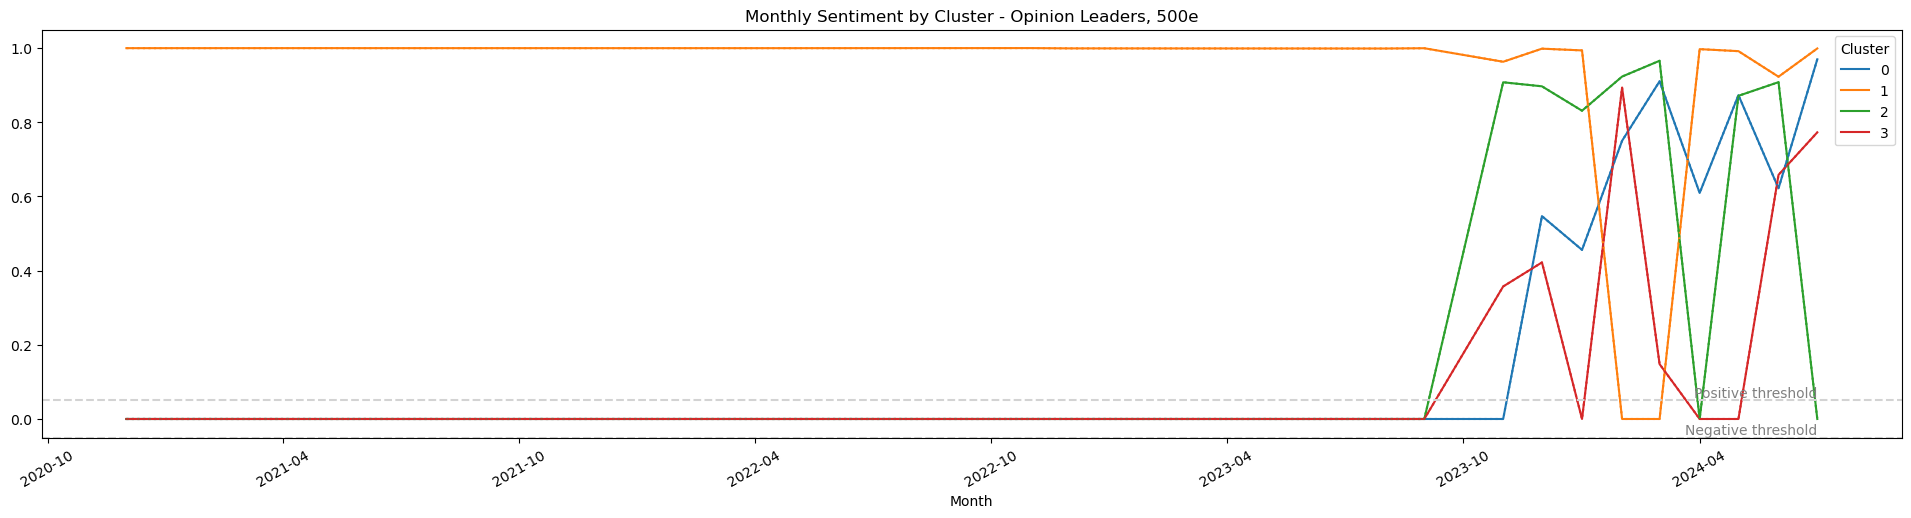

In [54]:
# Convert 'Date' column to datetime
opinionLeaders500['Date'] = pd.to_datetime(opinionLeaders500_original['Date'])

# Extract the month and year from the date
opinionLeaders500['Month'] = opinionLeaders500['Date'].dt.to_period('M')

# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
opinionLeaders500['Sentiment'] = opinionLeaders500['Text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Group by Month and Cluster, then calculate the average sentiment per month per cluster
monthly_cluster_sentiment = opinionLeaders500.groupby(['Month', 'Cluster'])['Sentiment'].mean().unstack(fill_value=0)

# Fill NaNs with the last available value for consistent plotting
filled_sentiment_data = monthly_cluster_sentiment.fillna(method='ffill')

# Convert the index to datetime for proper formatting
monthly_cluster_sentiment.index = monthly_cluster_sentiment.index.to_timestamp()
filled_sentiment_data.index = filled_sentiment_data.index.to_timestamp()

# Plot the original data without markers
fig, ax = plt.subplots(figsize=(24, 6))
monthly_cluster_sentiment.plot(ax=ax, title='Monthly Sentiment by Cluster - Opinion Leaders, 500e')

# Plot filled data with the same colors but dotted lines
for column in filled_sentiment_data.columns:
    filled_sentiment_data[column].plot(ax=ax, linestyle=':', color=ax.get_lines()[filled_sentiment_data.columns.get_loc(column)].get_color(), legend=False)

# Customize the legend
handles, labels = ax.get_legend_handles_labels()
# Only keep solid line handles in the legend
solid_line_handles = [handle for handle in handles if isinstance(handle, plt.Line2D) and handle.get_linestyle() == '-']
solid_line_labels = [labels[handles.index(handle)] for handle in solid_line_handles]
ax.legend(solid_line_handles, solid_line_labels, title='Cluster')

# Customize the x-axis to show dates in 'yyyy-mm' format without rotating the labels
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Set x-ticks locator to show fewer ticks
locator = MonthLocator(interval=6)  # Show ticks every 6 months
ax.xaxis.set_major_locator(locator)

# Center x-axis labels
for label in ax.get_xticklabels():
    label.set_horizontalalignment('center')

# Add threshold lines
plt.axhline(y=-0.05, color='lightgray', linestyle='--')
plt.axhline(y=0.05, color='lightgray', linestyle='--')
plt.text(monthly_cluster_sentiment.index[-1], -0.05, 'Negative threshold', verticalalignment='bottom', horizontalalignment='right', color='gray')
plt.text(monthly_cluster_sentiment.index[-1], 0.05, 'Positive threshold', verticalalignment='bottom', horizontalalignment='right', color='gray')

# Show plot
plt.show()


# Potential Customers 500e: Comments 500e

In [40]:
comments_500e_original = pd.read_csv('500e - Potential Customers_20240804.csv')
comments_500e = comments_500e_original.copy()
comments_500e.head()

,Date,Source,Text
0,2023-07-21,SpeakEV,hi there we will receive our new fiat 500e ico...
1,2023-08-17,SpeakEV,hi there i have ordered a fiat 500e icon on le...
2,2022-10-22,SpeakEV,i had my 2015 fiat 500e shipped from ca a few ...
3,2023-09-12,SpeakEV,the latest fiat 500e la prima designio by kahn...
4,2023-09-26,SpeakEV,is there a way to delete not just unselect a c...


### NEW

#### Clustering analysis

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/janapawlenczuk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/janapawlenczuk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Users/janapawlenczuk/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


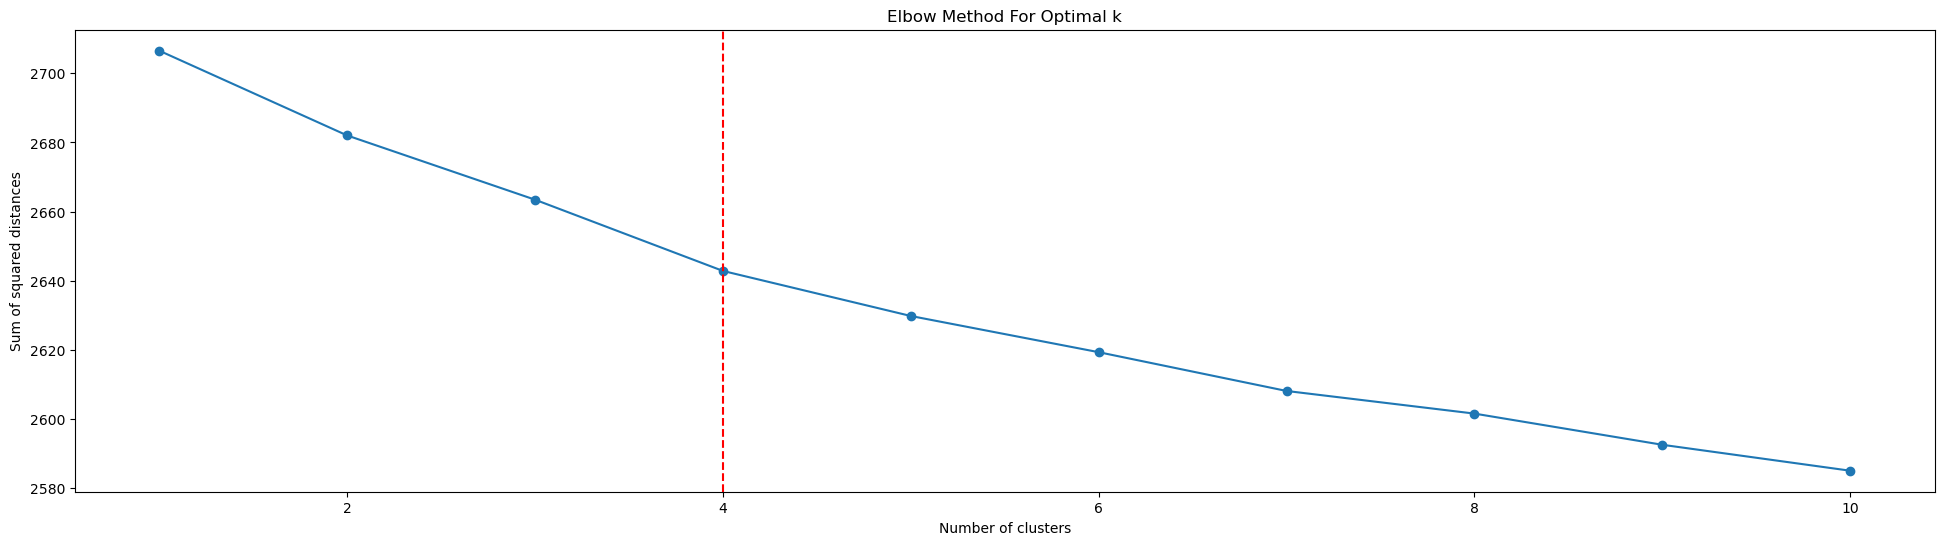

                                                Text  Cluster
0  hi there we will receive our new fiat 500e ico...        3
1  hi there i have ordered a fiat 500e icon on le...        3
2  i had my 2015 fiat 500e shipped from ca a few ...        2
3  the latest fiat 500e la prima designio by kahn...        3
4  is there a way to delete not just unselect a c...        1

Cluster 0
thank,johnny,really,good,thanks,love,jonny,car,great,review

Cluster 1
good,would,love,nice,great,electric,little,city,like,car

Cluster 2
honda,one,would,love,buy,range,new,like,car,fiat

Cluster 3
miles,dont,would,electric,like,get,one,cars,range,ev


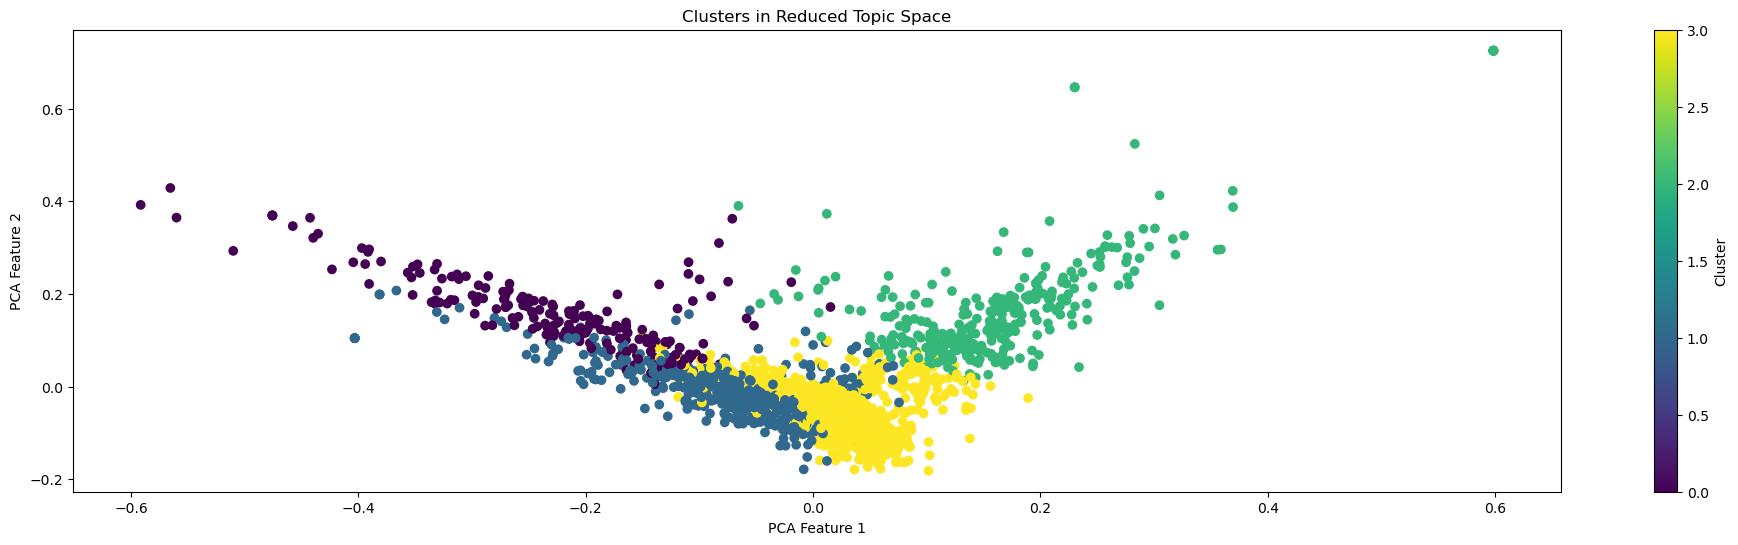


Cluster 0 Summary:
247    good honest review thanks like the car im in a...
254    712 strangely aroused at this pointanywayconce...
259            what a great reviewer love her wit humour
265    just passing by locking for a review what is t...
284    fabulous review and the reviewer has buckets o...
287    a charismatic car and a charismatic reviewer g...
321    great review again my wife loves hers and the ...
325    great review nicola fiat should consider a new...
337    carbuyer great little car though i had the pan...
343                                  great review thanks
Name: Text, dtype: object

Cluster 1 Summary:
4     is there a way to delete not just unselect a c...
5     hello everyone i have bought a fiat 500e icon ...
23    hi all im a first time car owner and got mysel...
35    ive posted this in the fiat 500 forum with mor...
39    hi there i have a 500e icon on lease and it wa...
41    just joined this forum i live in oregon usa wh...
49    i had a 2016 nissan le

In [41]:
# Download necessary NLTK data files for tokenisation and stopwords
nltk.download('punkt')
nltk.download('stopwords')

# Add 'leaf' to custom_stopwords
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.add('leaf') 

# Define preprocessing function
def preprocess(text):
    if isinstance(text, str):
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha() and word not in custom_stopwords]
        return ' '.join(tokens)
    else:
        return ''

# Preprocess the text data
comments_500e['cleaned_text'] = comments_500e['Text'].apply(preprocess)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(comments_500e['cleaned_text'])

# Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_tfidf)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(24, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.axvline(x=4, color='red', linestyle='--')  # Add a red line for the optimal number of clusters
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

# Apply KMeans Clustering with optimal clusters determined by Elbow Method
optimal_k = 4  # Replace with the optimal number of clusters determined from the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_tfidf)

# Add the cluster labels to your original DataFrame
comments_500e['Cluster'] = clusters

# Display the DataFrame with the new cluster column
print(comments_500e[['Text', 'Cluster']].head())

# Print the clusters with key words
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    terms = labels
    for i, r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]]))

get_top_keywords(X_tfidf, clusters, tfidf_vectorizer.get_feature_names_out(), 10)

# Plotting cluster results using PCA for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(24, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters in Reduced Topic Space')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='Cluster')
plt.show()

# Analyze clusters
for cluster_num in range(optimal_k):
    cluster_data = comments_500e[comments_500e['Cluster'] == cluster_num]
    print(f"\nCluster {cluster_num} Summary:")
    print(cluster_data['Text'].head(10))  # Display sample comments from each cluster


In [42]:
# Ensure you have the necessary NLTK data
nltk.download('vader_lexicon')

# Add sentiment analysis
sid = SentimentIntensityAnalyzer()
comments_500e['Sentiment'] = comments_500e['Text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Function to get top keywords in each cluster
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    terms = labels
    top_keywords = {}
    for i, r in df.iterrows():
        top_keywords[i] = [terms[t] for t in np.argsort(r)[-n_terms:]]
    return top_keywords

# Function to get key comments for each cluster
def get_key_comments(data, clusters, n_comments):
    key_comments = {}
    for cluster_num in range(len(set(clusters))):
        cluster_data = data[data['Cluster'] == cluster_num]
        key_comments[cluster_num] = cluster_data[['Text', 'Sentiment']].head(n_comments).values.tolist()
    return key_comments

# Get top keywords and key comments
top_keywords = get_top_keywords(X_tfidf, clusters, tfidf_vectorizer.get_feature_names_out(), 10)
key_comments = get_key_comments(comments_500e, clusters, 10)

# Print top keywords, key comments, and average sentiment score for each cluster
for cluster_num in range(optimal_k):
    print(f"\nCluster {cluster_num} Top Keywords:")
    print(', '.join(top_keywords[cluster_num]))
    
    print(f"\nCluster {cluster_num} Key Comments:")
    for comment, sentiment in key_comments[cluster_num]:
        print(f"- {comment} (Sentiment: {sentiment})")
    
    avg_sentiment = comments_500e[comments_500e['Cluster'] == cluster_num]['Sentiment'].mean()
    print(f"\nCluster {cluster_num} Average Sentiment Score: {avg_sentiment}")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/janapawlenczuk/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Cluster 0 Top Keywords:
thank, johnny, really, good, thanks, love, jonny, car, great, review

Cluster 0 Key Comments:
- good honest review thanks like the car im in australia cant wait to test drive one 😅 (Sentiment: 0.891)
- 712 strangely aroused at this pointanywayconcentratetax returnsmother teresathats better back to the review (Sentiment: 0.1779)
- what a great reviewer love her wit humour (Sentiment: 0.9081)
- just passing by locking for a review what is this theater are you talking to a bunch of 5 year olds i get faulty towers vibes but without the irony fire the script maker please (Sentiment: 0.6219)
- fabulous review and the reviewer has buckets of charisma really entertaining (Sentiment: 0.7645)
- a charismatic car and a charismatic reviewer great review thanks (Sentiment: 0.7906)
- great review again my wife loves hers and the dog likes the back seat great fun to drive but if like me you have size 12 feet theres no room under the brake on uks rhd version you can buy a frun

**Cluster 0 Summary:**
Top Keywords: thank, johnny, really, good, thanks, love, jonny, car, great, review

Key Comments Summary:

This cluster predominantly features positive and appreciative comments about the car reviews, particularly praising the reviewers' charisma, humor, and thoroughness.
There is a high level of enthusiasm for the car, with many users expressing excitement about test driving it.
Positive sentiments dominate, with users often thanking the reviewer and expressing love for both the car and the review style.
Users also share personal experiences with the car, noting its fun aspects and practical considerations like space and usability.
Average Sentiment Score: 0.638

**Cluster 1 Summary:**
Top Keywords: good, would, love, nice, great, electric, little, city, like, car

Key Comments Summary:

This cluster includes a mix of comments with both positive and negative sentiments.
Users discuss practical concerns and experiences with the Fiat 500e, such as charging issues, ease of theft, baby seat compatibility, and dealing with technical problems.
Several comments are from first-time car owners or those new to electric vehicles, seeking advice and sharing their experiences.
Despite some negative experiences, users express love for the car and its suitability for city driving.
Average Sentiment Score: 0.298

**Cluster 2 Summary:**
Top Keywords: honda, one, would, love, buy, range, new, like, car, fiat

Key Comments Summary:

Comments in this cluster highlight practical aspects of owning and maintaining the Fiat 500e.
Users discuss servicing, installation of chargers, and importing the car.
There is a mix of positive and negative sentiments, with some users expressing love for the car while others mention issues such as difficulty finding parts or dealing with warranty repairs.
The cluster also includes some specific queries about car features and technical problems.
Average Sentiment Score: 0.231

**Cluster 3 Summary:**
Top Keywords: miles, don't, would, electric, like, get, one, cars, range, ev

Key Comments Summary:

This cluster focuses on the practicalities and logistics of using the Fiat 500e, especially related to charging and range.
Users discuss their experiences with the car's performance, charging infrastructure, and range anxiety.
There are also comments on the service intervals and general maintenance of the car.
Sentiments are mixed, with users appreciating the car's suitability for city driving and affordability, while also mentioning specific issues like software bugs and service intervals.
Average Sentiment Score: 0.241

#### Customer's journey analysis

In [43]:
# Download necessary NLTK data files for tokenisation and stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Load the data
comments_500e_original = pd.read_csv('500e - Potential Customers_20240804.csv')
comments_500e = comments_500e_original.copy()

# Define custom stopwords
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update({'leaf', 'car', 'cars', 'uh', 'yes', 'go', 'e', 'oh', 'still', 'fiat', 
                         'jeep', 'avenger', 'abarth', 'stellantis', 'hyundai', 'honda', 'kona', 
                         'kind', 'want', 'mean', 'fat', 'um', 'yeah', 'okay', 'one', 'content', 
                         'information', 'interests', 'activity', 'notice', 'also', 'would', 
                         'going', 'be', 'much', 'comes', 'like', 'bit', 'quite', 'lot', 'well', 
                         'really', 'get', 'got', 'little', 'feeling', 'think', 'actually', 'even', 
                         'however', 'around', 'see', 'know', 'presented', 'example', 'leaf'})

# Define preprocessing function
def preprocess(text):
    if isinstance(text, str):
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha() and word not in custom_stopwords]
        return ' '.join(tokens)
    else:
        return ''

# Preprocess the text data
comments_500e['cleaned_text'] = comments_500e['Text'].apply(preprocess)

# Define journey keywords
journey_keywords = {
    'awareness': [
        'considering', 'thinking about', 'interested in', 'exploring', 'hearing about', 'learning about', 
        'reading about', 'looking into', 'researching', 'looking at', 'deciding', 'researching', 
        'evaluating', 'comparing', 'analyzing', 'reviewing', 'debating', 'checking out', 'discover', 
        'learn', 'understand', 'explore', 'notice', 'recognize', 'find', 'seek', 'know', 'identify', 
        'realize', 'consider', 'observe', 'uncover', 'detect', 'read', 'watch', 'listen', 'aware', 
        'interest', 'curiosity', 'investigate', 'look for', 'browse', 'research', 'survey', 'familiarize', 
        'acknowledge', 'perceive', 'enlighten', 'examine', 'discover', 'catch sight of', 'encounter', 
        'gain insight', 'illuminate', 'introduce', 'join', 'participate', 'pay attention', 'probe', 
        'recognize', 'review', 'scan', 'scrutinize', 'search', 'seek out', 'study', 'test', 'understand', 
        'hear about', 'view', 'engage with', 'witness', 'inquire about', 'look into', 'delve into', 
        'get to know', 'survey', 'participate in', 'inform oneself', 'catch wind of', 'unearth', 'inspect', 
        'spot', 'catch glimpse of', 'gain knowledge of', 'contextualize', 'sense', 'learn about', 
        'get acquainted with', 'see', 'be exposed to', 'be mindful of', 'get wind of', 'be conscious of', 
        'note', 'catch', 'perceive', 'digest', 'behold', 'monitor', 'discover', 'detect', 'figure out'
    ],
    'purchase': [
        'just bought', 'just purchased', 'got my new', 'bought', 'shipped', 'purchased', 'ordered', 
        'picked up', 'acquired', 'receiving', 'ordering', 'ordered a', 'buying', 'picking up', 
        'received', 'will receive', 'have ordered', 'loving my new', 'happy with', 'enjoying my', 'i got',
        'satisfied with', 'pleased with', 'delighted with', 'using', 'experiencing', 'after purchase', 'i own',
        'owning', 'owned', 'driving', 'having', 'have ordered', 'leasing', 'lease', 'buy', 'order', 'i ordered',
        'purchase', 'acquire', 'get', 'obtain', 'secure', 'checkout', 'invest in', 'procure', 'take', 
        'reserve', 'add to cart', 'pay for', 'confirm', 'buy now', 'place order', 'complete purchase', 
        'enroll', 'sign up', 'lease', 'book', 'submit order', 'redeem', 'commit to buy', 'purchase online', 
        'make a deal', 'settle on', 'choose', 'pick', 'select', 'go for', 'accept offer', 'agree to buy', 
        'lock in purchase', 'execute transaction', 'cash out', 'shop for', 'bid', 'make payment', 
        'engage services', 'claim', 'rent', 'hire', 'appoint', 'schedule', 'preorder', 'layaway', 
        'put a down payment', 'opt for', 'get hold of', 'settle payment', 'put in order', 'put money down', 
        'agree to terms', 'contract', 'enter into agreement', 'make purchase', 'take ownership', 'wrap up sale', 
        'engage', 'part with money', 'buy in-store', 'sign contract', 'procure services', 'call for delivery', 
        'obtain goods', 'swap for', 'exchange for', 'barter for', 'click to buy', 'press to purchase', 
        'subscribe', 'join membership'
    ]
}

# Function to identify journey stage
def identify_journey_stage(text):
    text = text.lower()
    for stage, keywords in journey_keywords.items():
        if any(keyword in text for keyword in keywords):
            return stage
    return 'other'

# Identify the customer journey stage for each comment
comments_500e['Journey_Stage'] = comments_500e['cleaned_text'].apply(identify_journey_stage)

print(comments_500e[['Text', 'Journey_Stage']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/janapawlenczuk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/janapawlenczuk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/janapawlenczuk/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                Text Journey_Stage
0  hi there we will receive our new fiat 500e ico...      purchase
1  hi there i have ordered a fiat 500e icon on le...     awareness
2  i had my 2015 fiat 500e shipped from ca a few ...      purchase
3  the latest fiat 500e la prima designio by kahn...     awareness
4  is there a way to delete not just unselect a c...     awareness


Journey_Stage
awareness    0.426650
other        0.190173
purchase     0.230164
Name: Sentiment, dtype: float64


/var/folders/y6/qmf174vs799fh0j8zyjmr8y40000gn/T/ipykernel_40809/1718141993.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_data = monthly_stage_sentiment_filtered.fillna(method='ffill')


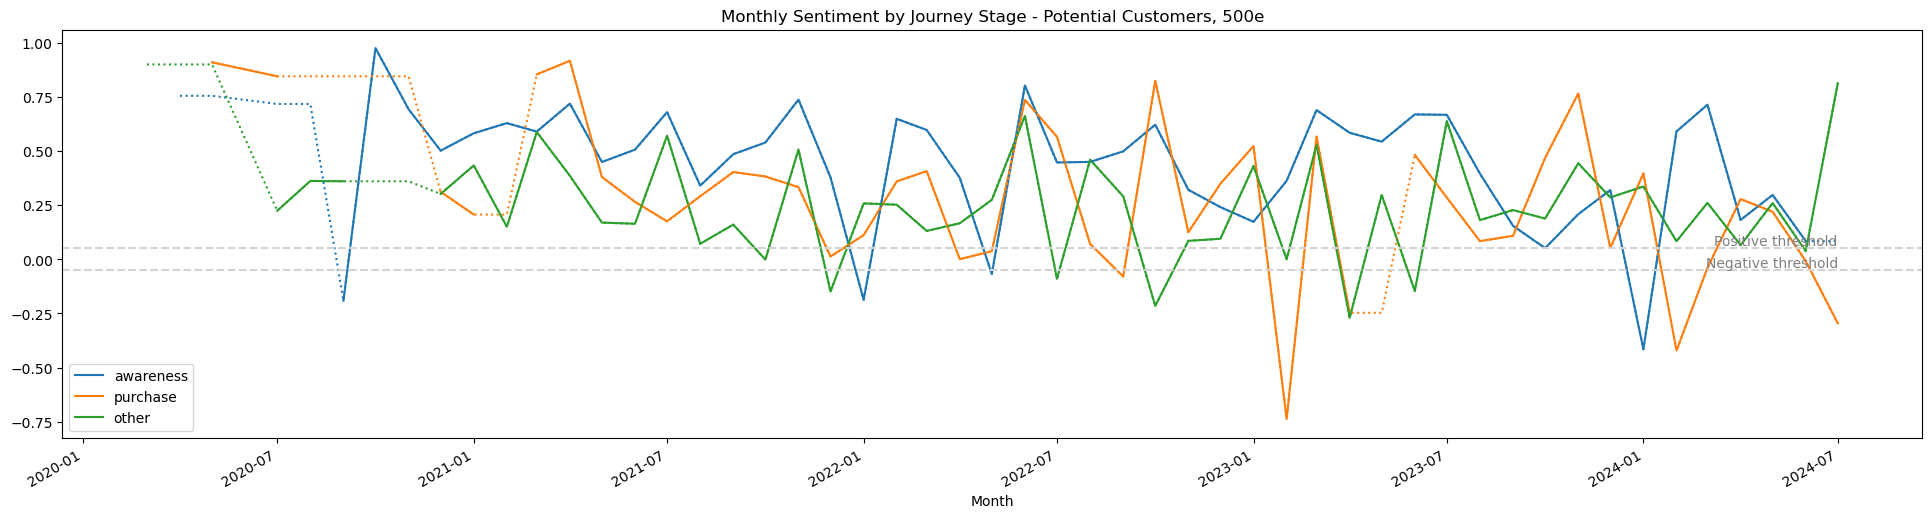

In [55]:
# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
comments_500e['Sentiment'] = comments_500e['Text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Analyze sentiment by journey stage
journey_stage_sentiment = comments_500e.groupby('Journey_Stage')['Sentiment'].mean()
print(journey_stage_sentiment)

# Timeline Analysis
comments_500e['Date'] = pd.to_datetime(comments_500e['Date'])
comments_500e['Month'] = comments_500e['Date'].dt.to_period('M')

# Group comments by stages of the journey and analyze the sentiment and content for each stage
monthly_stage_sentiment = comments_500e.groupby(['Journey_Stage', 'Month'])['Sentiment'].mean()
monthly_stage_sentiment = comments_500e.pivot_table(index='Month', columns='Journey_Stage', values='Sentiment', aggfunc='mean')

# Filter to only include awareness, purchase, and other stages
filtered_stages = ['awareness', 'purchase', 'other']
available_stages = [stage for stage in filtered_stages if stage in monthly_stage_sentiment.columns]
monthly_stage_sentiment_filtered = monthly_stage_sentiment[available_stages]

# Fill NaNs with last available value
filled_data = monthly_stage_sentiment_filtered.fillna(method='ffill')

# Convert the index to datetime for proper formatting
monthly_stage_sentiment_filtered.index = monthly_stage_sentiment_filtered.index.to_timestamp()
filled_data.index = filled_data.index.to_timestamp()

# Plot the original data without markers
fig, ax = plt.subplots(figsize=(24, 6))
monthly_stage_sentiment_filtered.plot(ax=ax, title='Monthly Sentiment by Journey Stage - Potential Customers, 500e')

# Plot filled data with the same colors but dotted lines
for column in filled_data.columns:
    filled_data[column].plot(ax=ax, linestyle=':', color=ax.get_lines()[filled_data.columns.get_loc(column)].get_color(), legend=False)

# Add threshold lines
plt.axhline(y=-0.05, color='lightgray', linestyle='--')
plt.axhline(y=0.05, color='lightgray', linestyle='--')
plt.text(monthly_stage_sentiment_filtered.index[-1], -0.05, 'Negative threshold', verticalalignment='bottom', horizontalalignment='right', color='gray')
plt.text(monthly_stage_sentiment_filtered.index[-1], 0.05, 'Positive threshold', verticalalignment='bottom', horizontalalignment='right', color='gray')

# Customize the x-axis to show dates in 'yyyy-mm' format
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Customize the legend
handles, labels = ax.get_legend_handles_labels()
solid_line_handles = [handle for handle in handles if isinstance(handle, plt.Line2D) and handle.get_linestyle() == '-']
solid_line_labels = [labels[handles.index(handle)] for handle in solid_line_handles]
ax.legend(solid_line_handles, solid_line_labels)

# Show plot
plt.show()


In [ ]:
# Timeline Analysis
comments_500e['Date'] = pd.to_datetime(comments_500e['Date'])
comments_500e['Month'] = comments_500e['Date'].dt.to_period('M')

# Group comments by stages of the journey and count the number of comments for each stage
monthly_stage_engagement = comments_500e.groupby(['Journey_Stage', 'Month']).size().unstack(fill_value=0)

# Filter to only include awareness, purchase, and other stages
filtered_stages = ['awareness', 'purchase', 'other']
available_stages = [stage for stage in filtered_stages if stage in monthly_stage_engagement.columns]
monthly_stage_engagement_filtered = monthly_stage_engagement[available_stages]

# Adjust display settings to show the entire DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Check the grouped data
print(monthly_stage_engagement)


Month          2020-03  2020-04  2020-05  2020-07  2020-08  2020-09  2020-10  \
Journey_Stage                                                                  
awareness            0        1        0        9        0        2        1   
other                1        0        0        4        1        1        0   
purchase             0        0        1        2        0        0        0   

Month          2020-11  2020-12  2021-01  2021-02  2021-03  2021-04  2021-05  \
Journey_Stage                                                                  
awareness            3      365        9        6        5        2       11   
other                0      390        7        4        4        3       31   
purchase             0      104        9        0        1        2       14   

Month          2021-06  2021-07  2021-08  2021-09  2021-10  2021-11  2021-12  \
Journey_Stage                                                                  
awareness           45        5       

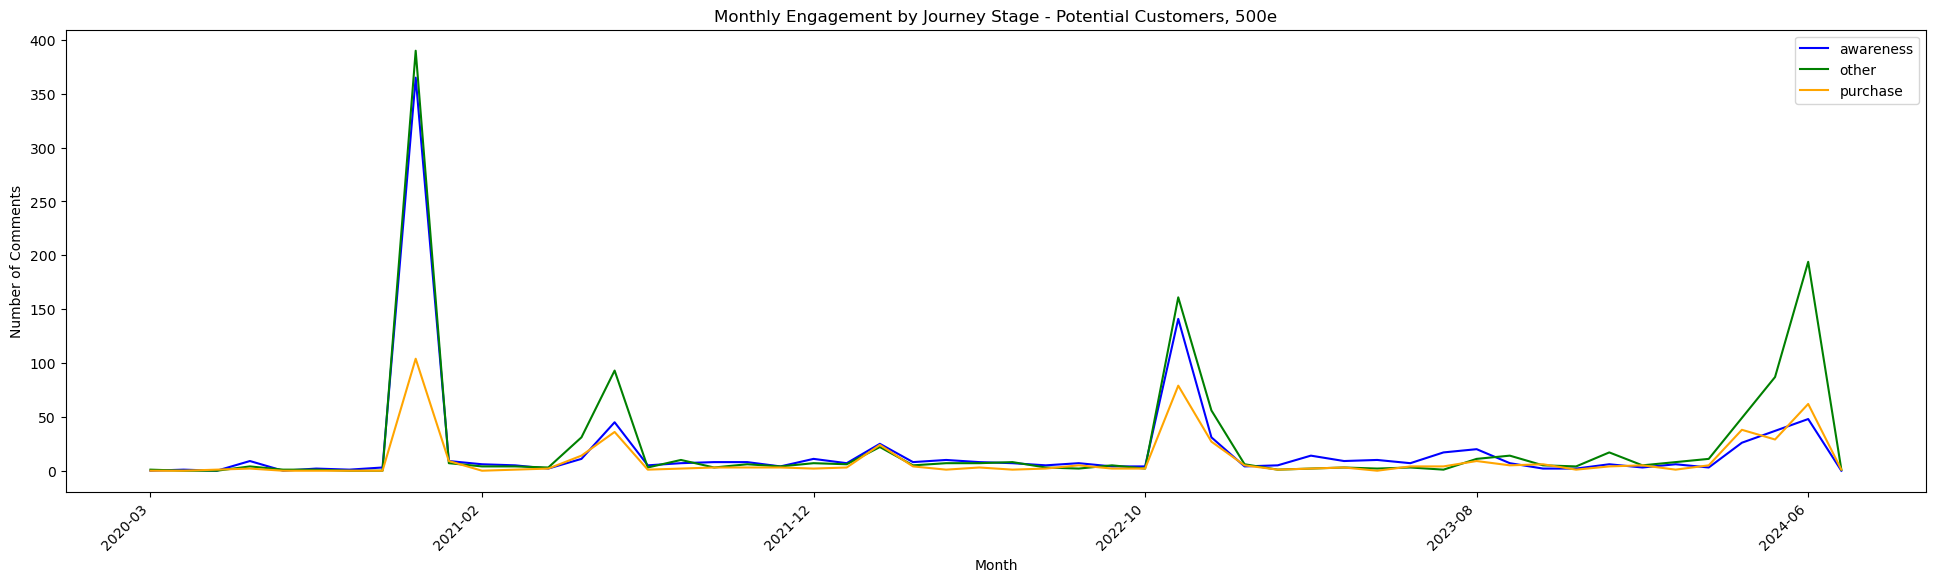

In [57]:
# Sample data to mimic the structure of the provided data
data = {
    '2020-03': [0, 1, 0],
    '2020-04': [1, 0, 0],
    '2020-05': [0, 0, 1],
    '2020-07': [9, 4, 2],
    '2020-08': [0, 1, 0],
    '2020-09': [2, 1, 0],
    '2020-10': [1, 0, 0],
    '2020-11': [3, 0, 0],
    '2020-12': [365, 390, 104],
    '2021-01': [9, 7, 9],
    '2021-02': [6, 4, 0],
    '2021-03': [5, 4, 1],
    '2021-04': [2, 3, 2],
    '2021-05': [11, 31, 14],
    '2021-06': [45, 93, 36],
    '2021-07': [5, 3, 1],
    '2021-08': [7, 10, 2],
    '2021-09': [8, 3, 3],
    '2021-10': [8, 6, 3],
    '2021-11': [4, 4, 3],
    '2021-12': [11, 7, 2],
    '2022-01': [7, 6, 3],
    '2022-02': [25, 22, 24],
    '2022-03': [8, 5, 4],
    '2022-04': [10, 7, 1],
    '2022-05': [8, 7, 3],
    '2022-06': [7, 8, 1],
    '2022-07': [5, 3, 2],
    '2022-08': [7, 2, 5],
    '2022-09': [4, 5, 2],
    '2022-10': [4, 2, 2],
    '2022-11': [141, 161, 79],
    '2022-12': [31, 56, 27],
    '2023-01': [4, 6, 5],
    '2023-02': [5, 1, 1],
    '2023-03': [14, 2, 2],
    '2023-04': [9, 3, 3],
    '2023-05': [10, 2, 0],
    '2023-06': [7, 3, 4],
    '2023-07': [17, 1, 4],
    '2023-08': [20, 11, 9],
    '2023-09': [7, 14, 5],
    '2023-10': [2, 5, 6],
    '2023-11': [2, 4, 1],
    '2023-12': [6, 17, 4],
    '2024-01': [3, 5, 5],
    '2024-02': [6, 8, 1],
    '2024-03': [3, 11, 5],
    '2024-04': [26, 49, 38],
    '2024-05': [37, 87, 29],
    '2024-06': [48, 194, 62],
    '2024-07': [0, 1, 1]
}

index = ['awareness', 'other', 'purchase']
monthly_stage_engagement = pd.DataFrame(data, index=index)

# Define custom colors for the stages
custom_colors = {'awareness': 'blue', 'purchase': 'orange', 'other': 'green'}

# Plotting the data
fig, ax = plt.subplots(figsize=(24, 6))

for stage in monthly_stage_engagement.index:
    monthly_stage_engagement.T[stage].plot(ax=ax, linestyle='-', color=custom_colors[stage], label=stage)

# Adding labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Number of Comments')
ax.set_title('Monthly Engagement by Journey Stage - Potential Customers, 500e')

# Removing x and y grid lines
ax.grid(False)

# Rotate x-axis labels
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment('right')

# Adding legend
ax.legend(title='Journey Stage')

# Customize the legend
handles, labels = ax.get_legend_handles_labels()
solid_line_handles = [handle for handle in handles if isinstance(handle, plt.Line2D) and handle.get_linestyle() == '-']
solid_line_labels = [labels[handles.index(handle)] for handle in solid_line_handles]
ax.legend(solid_line_handles, solid_line_labels)

# Show plot
plt.show()


#### Predictive model

In [58]:
# Sample data preparation
comments_500e['Purchase'] = np.random.randint(0, 2, size=len(comments_500e))  # This should be your actual target variable

# Feature engineering - Sentiment analysis
sia = SentimentIntensityAnalyzer()
comments_500e['Sentiment'] = comments_500e['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Text vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(comments_500e['Text'])

# Combine features
X = np.hstack((X_tfidf.toarray(), comments_500e[['Sentiment']].values))
y = comments_500e['Purchase'].values  # Assuming 'Purchase' is the target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Define and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Feature importance
feature_importances = model.feature_importances_
features = list(tfidf_vectorizer.get_feature_names_out()) + ['Sentiment']

# Ensure the lengths match before creating the DataFrame
if len(features) == len(feature_importances):
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    print(importance_df.head(10))
else:
    print(f"Feature names and importances lengths do not match: {len(features)} vs {len(feature_importances)}")

# Grid search for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

# Print best parameters
print("Best parameters found: ", grid_search.best_params_)

              precision    recall  f1-score   support

           0       0.50      0.56      0.53       476
           1       0.46      0.39      0.42       444

    accuracy                           0.48       920
   macro avg       0.48      0.48      0.48       920
weighted avg       0.48      0.48      0.48       920

        Feature  Importance
1000  Sentiment    0.034597
140         car    0.018354
327        fiat    0.013859
297          ev    0.010103
277    electric    0.009320
504        like    0.008569
709       range    0.007854
375       great    0.007768
888       think    0.007765
370        good    0.007717
Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_s